<a href="https://colab.research.google.com/github/RegaipKURT/Python-Projects/blob/master/Quantum_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip3 install qiskit 

In [0]:
import qiskit as q
%matplotlib inline

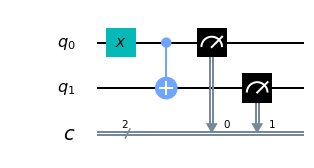

In [14]:
circuit = q.QuantumCircuit(2,2) # 2 qubits and 2 classical bits

#aşağıdaki kapıları ve kullanım şeklimizi anlamak için aşağıdaki linke bakılabilir.:
# https://quantum-computing.ibm.com/support/guides/gate-overview?section=5d00d964853ef8003c6d6820#
# currently 0,0
circuit.x(0) # pauli x kapısı
# 1,0 
circuit.cx(0,1) # controlled x gate

#1,1
circuit.measure([0,1],[0,1])
circuit.draw() # basit çizim
circuit.draw(output="mpl") # matplotlib üzerine çizim

In [19]:
from qiskit import IBMQ
IBMQ.save_account(open("token.txt", "r").read())
IBMQ.load_account()

/usr/local/lib/python3.6/dist-packages/qiskit/providers/ibmq/credentials/configrc.py:130: UserWarning: Credentials already present. Set overwrite=True to overwrite.
  warnings.warn('Credentials already present. '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [24]:
# provider ları yani sağlayıcıları alalım ve hangi bilgisayarlar üzerinde işlem yapabiliriz bakalım.

provider = IBMQ.get_provider("ibm-q")

for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"

    print(f"{backend.name()} has {backend.status().pending_jobs} qued and {qubit_count} qubits.")

ibmq_qasm_simulator has 0 qued and simulated qubits.
ibmqx2 has 0 qued and 5 qubits.
ibmq_16_melbourne has 15 qued and 14 qubits.
ibmq_vigo has 9 qued and 5 qubits.
ibmq_ourense has 12 qued and 5 qubits.
ibmq_london has 1 qued and 5 qubits.
ibmq_burlington has 0 qued and 5 qubits.
ibmq_essex has 7 qued and 5 qubits.


In [42]:
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend("ibmq_burlington") # yukarıdan br bilgisayar seçtik işlem için
job = q.execute(circuit, backend=backend, shots=500) #işlemimizi belirledik
job_monitor(job)

Job Status: job has successfully run


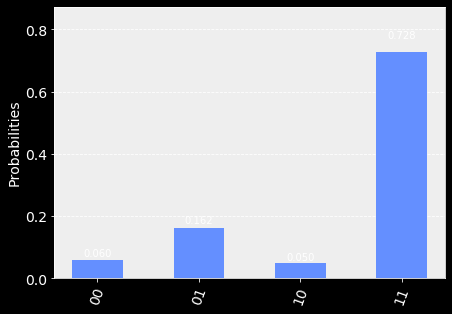

In [43]:
from qiskit.visualization import plot_histogram # sonucu görselleştirnek için
from matplotlib import style

style.use("dark_background") # plot arkaplanını koyu yaptık
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts]) # grafikte 1,1 dışındaki beklenmeyen değerleri de göreceğiz
# buna quantum noise deniyor.

## **Şimdi başka bir quantum kapısı deneyelim**

Job Status: job has successfully run


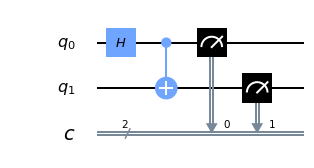

In [50]:
circuit = q.QuantumCircuit(2,2) # 2 qubits and 2 classical bits

# currently 0,0
circuit.h(0) # hadamard kapısı ==> süperpozisyon durumuna getirir.
# 1,0 
circuit.cx(0,1) # controlled x gate

#1,1
circuit.measure([0,1],[0,1])

backend = provider.get_backend("ibmq_burlington") # yukarıdan br bilgisayar seçtik işlem için
job = q.execute(circuit, backend=backend, shots=500) #işlemimizi belirledik
job_monitor(job)
circuit.draw(output="mpl") # matplotlib üzerine çizim

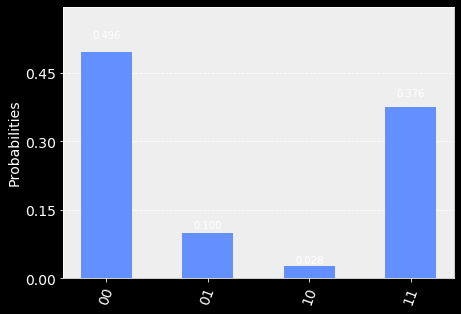

In [51]:
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts]) # grafikte 1,1 dışındaki beklenmeyen değerleri de göreceğiz
# buna quantum noise deniyor.

# **Yerel simulatör içinde kullanma**

In [55]:
from qiskit import Aer # simulator  framework for qiskit

sim_backend = Aer.get_backend("qasm_simulator")


#içindeki diğer backend makinelere bakalım
for backend in Aer.backends():
    print(backend)

# qasm_simulator
# statevector_simulator
# unitary_simulator

qasm_simulator
statevector_simulator
unitary_simulator
